### 1.Implement and demonstratethe FIND-Salgorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file.

Input csv file:

book1.csv


In [2]:
import csv 
with open('book1.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
h = [['0', '0', '0', '0', '0', '0']]
print ("\n The most specific hypothesis : ['0','0','0','0','0',' 0']\n")
for i in your_list:
    if i[-1] == "Yes":
        j = 0
        for x in i:  
            if x != "Yes":
                if x!=h[0][j] and h[0][j] == '0':
                    h[0][j] = x
                elif x!=h[0][j] and h[0][j]!='0':
                    h[0][j]='?'
                else:
                    pass
            j=j+1
print("\n The Maximally Specific Hypothesis for a given Training Examples :\n")
print(h)


 The most specific hypothesis : ['0','0','0','0','0',' 0']


 The Maximally Specific Hypothesis for a given Training Examples :

[['Sunny', 'Warm', '?', 'Strong', '?', '?']]


### 2.For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.

Task: The CANDIDATE-ELIMINATION algorithm computes the version space containing all hypotheses from H that are consistent with an observed sequence of training examples


Input csv file:

book1.csv

In [3]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('book1.csv'))
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    indices = [i for i,val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final S:", s_final, sep="\n")
print("Final G:", g_final, sep="\n")

Final S:
['Sunny' 'Warm' '?' 'Strong' '?' '?']
Final G:
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


### 4.Build an Artificial Neural Network by implementing the Back propagation algorithm and test the same using appropriate data set

In [5]:
import numpy as np # numpy is commonly used to process number array
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) # Features ( Hrs Slept, Hrs Studied)
y = np.array(([92], [86], [89]), dtype=float) # Labels(Marks obtained)
X = X/np.amax(X,axis=0) # Normalize
y = y/100
def sigmoid(x):
     return 1/(1 + np.exp(-x))
def sigmoid_grad(x):
     return x * (1 - x)
# Variable initialization
epoch=1000 			#Setting training iterations
eta =0.2 			#Setting learning rate (eta)
input_neurons = 2 		#number of features in data set
hidden_neurons = 3 		#number of hidden layers neurons
output_neurons = 1 		#number of neurons at output layerlr=0.1 #Setting learning rate

inputlayer_neurons = 2 	#number of features in data set
hiddenlayer_neurons = 3 	#number of hidden layers neurons
output_neurons = 1 		#number of neurons at output layer
# Weight and bias - Random initialization
wh=np.random.uniform(size=(input_neurons,hidden_neurons))	 	# 2x3
bh=np.random.uniform(size=(1,hidden_neurons)) 				# 1x3
wout=np.random.uniform(size=(hidden_neurons,output_neurons)) 	# 1x1
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
#Forward Propogation
      h_ip=np.dot(X,wh) + bh		 # Dot product + bias
      h_act = sigmoid(h_ip) 		# Activation function
      o_ip=np.dot(h_act,wout) + bout
      output = sigmoid(o_ip)
#Backpropagation
# Error at Output layer
Eo = y-output 				# Error at o/p
outgrad = sigmoid_grad(output)
d_output = Eo* outgrad 		# Errj=Oj(1-Oj)(Tj-Oj)
# Error at Hidden later
Eh = d_output.dot(wout.T) 		# .T means transpose
hiddengrad = sigmoid_grad(h_act) 	# How much hidden layer wts contributed to error
d_hidden = Eh * hiddengrad
wout += h_act.T.dot(d_output) *eta 	# Dotproduct of nextlayererror and currentlayerop
wh += X.T.dot(d_hidden) *eta
print("Normalized Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Normalized Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.84258253]
 [0.83414883]
 [0.84705005]]


### 5.Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.


In [7]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('iris.csv')

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

classifier = GaussianNB()
classifier.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))

Accuracy is: 0.9666666666666667


### 6. Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform this task. Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and recall for your data set.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
cancer=datasets.load_breast_cancer()
x=cancer.data
y=cancer.target
print(x.shape)
print(y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
clf=GaussianNB()
gnb=clf.fit(xtrain,ytrain)
predicted=gnb.predict(xtest)
print(metrics.confusion_matrix(ytest,predicted))
print(metrics.accuracy_score(ytest,predicted))
print(metrics.recall_score(ytest,predicted))
print(metrics.precision_score(ytest,predicted))


(569, 30)
(569,)
[[ 54   5]
 [  6 106]]
0.935672514619883
0.9464285714285714
0.954954954954955


### 7.Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. You can use Java/Python ML library classes/API

## For program 7 we need pgmpy. To use that we want to install that by using this command "conda install -c ankurankan pgmpy"## 

In [9]:
conda install -c ankurankan pgmpy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
data=pd.read_csv("heart_disease_data1.csv")
heart_disease=pd.DataFrame(data)
print(heart_disease)

from pgmpy.models import BayesianModel
model=BayesianModel([
('age','Lifestyle'),
('Gender','Lifestyle'),
('Family','heartdisease'),
('diet','cholestrol'),
('Lifestyle','diet'),
('cholestrol','heartdisease'),
('diet','cholestrol')
])

from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)


from pgmpy.inference import VariableElimination
HeartDisease_infer = VariableElimination(model)

print('For age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
print('For Gender Enter Male:0, Female:1')
print('For Family History Enter yes:1, No:0')
print('For diet Enter High:0, Medium:1')
print('for lifeStyle Enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('for cholesterol Enter High:0, BorderLine:1, Normal:2')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age':int(input('enter age')),
    'Gender':int(input('enter Gender')),
    'Family':int(input('enter Family history')),
    'diet':int(input('enter diet')),
    'Lifestyle':int(input('enter Lifestyle')),
    'cholestrol':int(input('enter cholestrol'))
    })

print(q)

    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0          

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              1.0000 |
+-----------------+---------------------+


### 8.Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

Text(0.5, 1.0, 'GMM Classification')

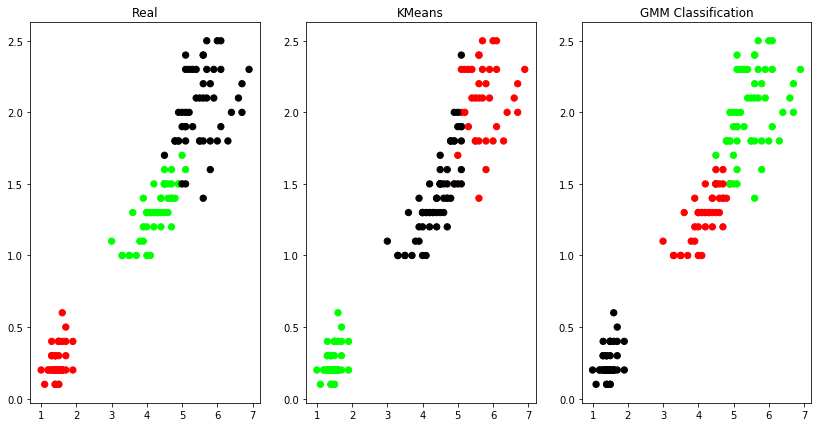

In [2]:
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture 
from sklearn.datasets import load_iris
import sklearn.metrics as sm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset=load_iris() 
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y=pd.DataFrame(dataset.target)
y.columns=['Targets'] 
plt.figure(figsize=(14,7)) 
colormap=np.array(['red','lime','black'])
#REAL PLOT
plt.subplot(1,3,1) 
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40) 
plt.title('Real')
#KMeans -PLOT 
plt.subplot(1,3,2) 
model=KMeans(n_clusters=3) 
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64) 
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40) 
plt.title('KMeans')
#GMM PLOT
scaler=preprocessing.StandardScaler() 
scaler.fit(X)
xsa=scaler.transform(X) 
xs=pd.DataFrame(xsa,columns=X.columns) 
gmm=GaussianMixture(n_components=3) 
gmm.fit(xs) 
y_cluster_gmm=gmm.predict(xs) 
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification') 



### 9.Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

     TASK: The task of this program is to classify the IRIS data set examples by using the k-Nearest              Neighbour algorithm. The new instance has to be classified based on its k nearest neighbors


In [12]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data
iris_labels=iris.target
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_labels,test_size=0.30)
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Confusion matrix is as follows")
print(confusion_matrix(y_test,y_pred))
print("Accuracy matrix")
print(classification_report(y_test,y_pred))


Confusion matrix is as follows
[[17  0  0]
 [ 0 12  1]
 [ 0  2 13]]
Accuracy matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      0.92      0.89        13
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### 10.Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

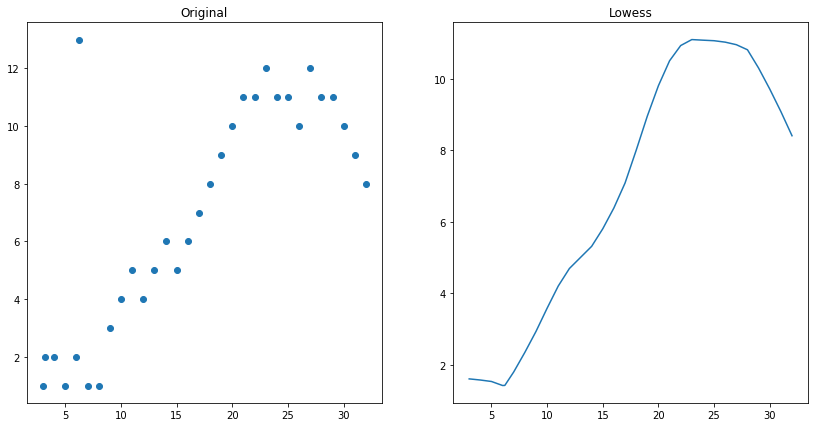

In [13]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
x=list(range(3,33))+[3.2,6.2]
y=[1,2,1,2,1,1,3,4,5,4,5,6,5,6,7,8,9,10,11,11,12,11,11,10,12,11,11,10,9,8,2,13]
lowess=sm.nonparametric.lowess(y,x,frac=0.3) 
lowess_x=list(zip(*lowess))[0] 
lowess_y=list(zip(*lowess))[1]
plt.figure(figsize=(14,7)) 
plt.subplot(1,2,1) 
plt.title('Original') 
plt.plot(x,y,'o')
plt.subplot(1,2,2) 
plt.title('Lowess')
plt.plot(lowess_x,lowess_y,'-')
plt.show()
